Import Data

In [81]:
import pandas as pd
import folium 
from folium.plugins import MarkerCluster
from folium.features import DivIcon
import geopandas as gdp
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium.plugins import *
import sys
sys.path.insert(0,'folium')
##import seaborn as sns

derecho911_df = pd.read_csv("..\data\911_Phone Calls_Derecho_050320 050420.csv")
tornado911_df = pd.read_csv("..\data\911_Phone_Calls_Tornado_030320.csv")

derecho_incidents_df = pd.read_csv("..\data\Computer Aided Dispatch Data_Derecho Incidents 050320_050420.csv", skiprows=3)
tornado_incidents_df = pd.read_csv("..\data\Computer Aided Dispatch Data_Tornado Incidents 030320.csv", skiprows=3)

##print(derecho911_df.head(100))
print(tornado911_df)





    Seizure DateTime CallTypeId  ALI Latitude  ALI Longitude  \
0      3/3/2020 0:34  911 Calls     36.072708     -86.665779   
1      3/3/2020 0:36  911 Calls     36.159634     -86.841904   
2      3/3/2020 0:36  911 Calls     36.264153     -86.708862   
3      3/3/2020 0:36  911 Calls           NaN            NaN   
4      3/3/2020 0:36  911 Calls     36.233467     -86.721077   
..               ...        ...           ...            ...   
470    3/3/2020 4:54  911 Calls     36.142552     -86.635330   
471    3/3/2020 4:54  911 Calls     36.189415     -86.813557   
472    3/3/2020 4:55  911 Calls     36.223534     -86.757874   
473    3/3/2020 4:56  911 Calls     36.168398     -86.783774   
474    3/3/2020 4:58  911 Calls     36.276566     -86.799417   

                    Cell Tower Address  
0           620 Richards RD - N Sector  
1               4507D KENTUCKY AV - SE  
2             329 THELMA ST - S Sector  
3                       526 FOUNDRY DR  
4                 5007B RU

4a. Locations less impacted or not impacted based on call volume( or lack thereof)

In [2]:
#print(derecho911_df.head(5))
print(tornado911_df.head(5))
#Derecho911_df.groupby('a').count()
derecho911_df['ALI Latitude'] = derecho911_df['ALI Latitude'].fillna(0)
derecho911_df['ALI Longitude'] = derecho911_df['ALI Longitude'].fillna(0)



##Turn NaNs into zeroes
derecho911_df['LatLong'] = derecho911_df.apply(lambda row: [row['ALI Latitude'], row['ALI Longitude']], axis=1)



##Make a latLong column which contains an array which is the form required for map markers
map = folium.Map(location=[36.247802, -86.716847], zoom_start=12)

##This is an arbitrary location within Nashville to start; this could be more centered
m = folium.TileLayer('stamentoner').add_to(map)
for location in derecho911_df['LatLong']:
    folium.Marker(location=location).add_to(map)
map


#neighborhoods = gdp.read_file('..\data\zipcodes.geojson')
#print(neighborhoods.crs)
#neighborhoods.head()



  Seizure DateTime CallTypeId  ALI Latitude  ALI Longitude  \
0    3/3/2020 0:34  911 Calls     36.072708     -86.665779   
1    3/3/2020 0:36  911 Calls     36.159634     -86.841904   
2    3/3/2020 0:36  911 Calls     36.264153     -86.708862   
3    3/3/2020 0:36  911 Calls           NaN            NaN   
4    3/3/2020 0:36  911 Calls     36.233467     -86.721077   

           Cell Tower Address  
0  620 Richards RD - N Sector  
1      4507D KENTUCKY AV - SE  
2    329 THELMA ST - S Sector  
3              526 FOUNDRY DR  
4        5007B RUSKIN AVE - N  


epsg:4326


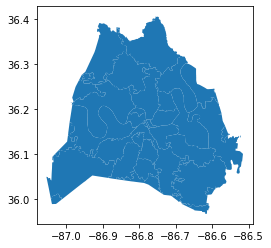

In [3]:
zipcodes = gdp.read_file('..\data\zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )
# zipcodes.geometry.to_crs('EPSG:4326')
# print(zipcodes.crs)
zipcodes.plot();

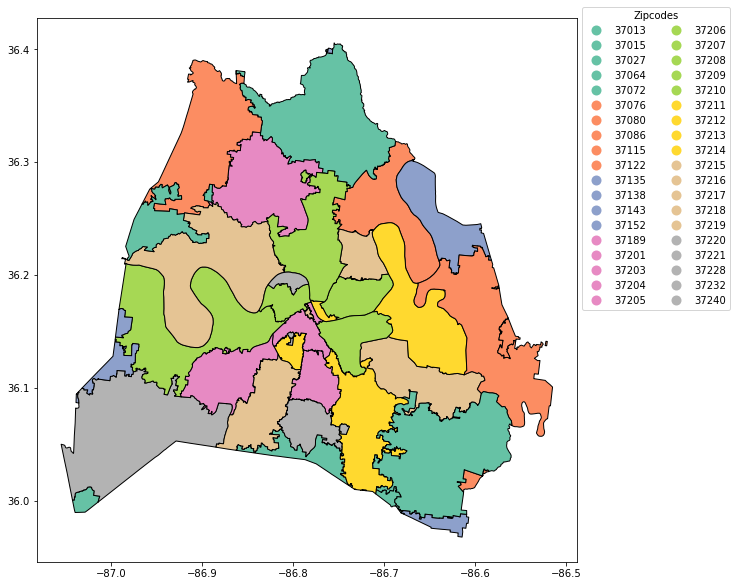

In [4]:

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [5]:
derecho911_df = pd.read_csv("..\data\911_Phone Calls_Derecho_050320 050420.csv")
tornado911_df = pd.read_csv("..\data\911_Phone_Calls_Tornado_030320.csv")
#print(derecho911_df.shape)
#derecho911_df.head(3)
#print(tornado911_df.head(5))
#tornado911_df.head(3)


#print(derecho911_df)
derecho911_df['Seizure DateTime'].replace('', np.nan, inplace=True)
derecho911_df['CallTypeId'].replace('', np.nan, inplace=True)
derecho911_df['ALI Latitude'].replace('', np.nan, inplace=True)
derecho911_df['ALI Longitude'].replace('', np.nan, inplace=True)
derecho911_df['Cell Tower Address'].replace('', np.nan, inplace=True)

##derecho911_df = derecho911_df[derecho911_df['ALI Latitude'].notna()]
derecho911_df = derecho911_df.dropna()
#print(derecho911_df)
derecho911_df = derecho911_df.rename(columns={"ALI Latitude": "lat", "ALI Longitude": "lng"}, errors="raise")



#print(tornado911_df)
tornado911_df['Seizure DateTime'].replace('', np.nan, inplace=True)
tornado911_df['CallTypeId'].replace('', np.nan, inplace=True)
tornado911_df['ALI Latitude'].replace('', np.nan, inplace=True)
tornado911_df['ALI Longitude'].replace('', np.nan, inplace=True)
tornado911_df['Cell Tower Address'].replace('', np.nan, inplace=True)

##derecho911_df = derecho911_df[derecho911_df['ALI Latitude'].notna()]
tornado911_df = tornado911_df.dropna()
#print(derecho911_df)
tornado911_df = tornado911_df.rename(columns={"ALI Latitude": "lat", "ALI Longitude": "lng"}, errors="raise")





In [6]:
derecho911_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1483 entries, 0 to 1547
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Seizure DateTime    1483 non-null   object 
 1   CallTypeId          1483 non-null   object 
 2   lat                 1483 non-null   float64
 3   lng                 1483 non-null   float64
 4   Cell Tower Address  1483 non-null   object 
dtypes: float64(2), object(3)
memory usage: 69.5+ KB


In [7]:

derecho911_df['geometry'] = derecho911_df.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)

derecho911_df.head(3)


tornado911_df['geometry'] = tornado911_df.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)

tornado911_df.head(3)

,Seizure DateTime,CallTypeId,lat,lng,Cell Tower Address,geometry
0,3/3/2020 0:34,911 Calls,36.072708,-86.665779,620 Richards RD - N Sector,POINT (-86.665779 36.072708)
1,3/3/2020 0:36,911 Calls,36.159634,-86.841904,4507D KENTUCKY AV - SE,POINT (-86.841904 36.159634)
2,3/3/2020 0:36,911 Calls,36.264153,-86.708862,329 THELMA ST - S Sector,POINT (-86.708862 36.264153)


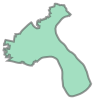

In [8]:
zipcodes.loc[0, 'geometry']

In [9]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
derecho911_geo = gdp.GeoDataFrame(derecho911_df, 
                           crs = zipcodes.crs, 
                           geometry = derecho911_df['geometry'])


tornado911_geo = gdp.GeoDataFrame(tornado911_df, 
                           crs = zipcodes.crs, 
                           geometry = tornado911_df['geometry'])




In [11]:
#type(derecho911_geo)
#type(tornado911_geo)
print(derecho911_geo)

     Seizure DateTime CallTypeId        lat        lng  \
0      5/3/2020 16:30  911 Calls  36.247802 -86.716847   
1      5/3/2020 16:30  911 Calls  36.143108 -86.800621   
2      5/3/2020 16:30  911 Calls  36.100516 -87.056329   
3      5/3/2020 16:30  911 Calls  36.130021 -86.927819   
4      5/3/2020 16:31  911 Calls  36.142380 -86.881882   
...               ...        ...        ...        ...   
1543    5/4/2020 0:16  911 Calls  36.067911 -86.622970   
1544    5/4/2020 0:18  911 Calls  36.131694 -86.770535   
1545    5/4/2020 0:22  911 Calls  36.042237 -86.743455   
1546    5/4/2020 0:25  911 Calls  36.077664 -86.655607   
1547    5/4/2020 0:29  911 Calls  36.024706 -86.743562   

                       Cell Tower Address                    geometry  
0                         WIRELESS CALLER  POINT (-86.71685 36.24780)  
1                     1161 21ST AV S - SE  POINT (-86.80062 36.14311)  
2                   8013 C MCCRORY LN - N  POINT (-87.05633 36.10052)  
3              

In [12]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

print(zipcodes)

      zip         po_name                                           geometry
0   37115         MADISON  MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ...
1   37216       NASHVILLE  MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ...
2   37204       NASHVILLE  MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ...
3   37027       BRENTWOOD  MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ...
4   37064        FRANKLIN  MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ...
5   37143          PEGRAM  MULTIPOLYGON (((-87.03553 36.08659, -87.03556 ...
6   37080         JOELTON  MULTIPOLYGON (((-86.86263 36.37811, -86.86264 ...
7   37221       NASHVILLE  MULTIPOLYGON (((-86.97084 36.11644, -86.97084 ...
8   37072  GOODLETTSVILLE  MULTIPOLYGON (((-86.75361 36.40428, -86.75354 ...
9   37212       NASHVILLE  MULTIPOLYGON (((-86.80790 36.14643, -86.80605 ...
10  37135     NOLENSVILLE  MULTIPOLYGON (((-86.67188 35.98955, -86.67189 ...
11  37027       BRENTWOOD  MULTIPOLYGON (((-86.72012 36.00886, -86.72012 ...

In [13]:
derecho911_calls_by_zip = gdp.sjoin(derecho911_geo, zipcodes, op = 'within')
tornado911_calls_by_zip = gdp.sjoin(tornado911_geo, zipcodes, op = 'within')

In [14]:
derecho911_calls_by_zip.head()
tornado911_calls_by_zip.head()

,Seizure DateTime,CallTypeId,lat,lng,Cell Tower Address,geometry,index_right,zip,po_name
0,3/3/2020 0:34,911 Calls,36.072708,-86.665779,620 Richards RD - N Sector,POINT (-86.66578 36.07271),51,37013,ANTIOCH
10,3/3/2020 0:38,911 Calls,36.052055,-86.648331,745 BELL RD - OMNI Sector,POINT (-86.64833 36.05205),51,37013,ANTIOCH
64,3/3/2020 0:53,911 Calls,36.050048,-86.650629,5646 AMALIE DR - SE,POINT (-86.65063 36.05005),51,37013,ANTIOCH
194,3/3/2020 1:29,911 Calls,36.068298,-86.681550,3930 APACHE TRAIL - SE SECTOR,POINT (-86.68155 36.06830),51,37013,ANTIOCH
234,3/3/2020 1:40,911 Calls,36.058578,-86.699745,5067 COLEMONT DR - N,POINT (-86.69974 36.05858),51,37013,ANTIOCH


In [15]:
#derecho911_calls_by_zip['zip'].value_counts()

In [16]:
#tornado911_calls_by_zip['zip'].value_counts()

In [17]:
# Set zipcode type to string (folium)
derecho911_calls_by_zip['zipcode'] = derecho911_calls_by_zip['zip'].astype('str')
derecho911_calls_by_zip['po_name'] = derecho911_calls_by_zip['po_name'].astype('str')

#print(derecho911_calls_by_zip)



# get the mean value across all data points
#zipcode_data = derecho911_calls_by_zip.groupby('zip').aggregate(np.mean)
zipcode_data = derecho911_calls_by_zip.groupby(['zip','po_name']).aggregate(np.mean)

zipcode_data.reset_index(inplace = True)

derecho911_calls_by_zip['count'] = 1
#temp = derecho911_calls_by_zip.groupby('zip').sum()
temp = derecho911_calls_by_zip.groupby(['zip','po_name']).sum()
temp.reset_index(inplace = True)
temp = temp[['zip', 'po_name','count']]
zipcode_data = pd.merge(zipcode_data, temp, on='zip')

#zipcode_data.head(100)






# Set zipcode type to string (folium)
tornado911_calls_by_zip['zipcode'] = tornado911_calls_by_zip['zip'].astype('str')
tornado911_calls_by_zip['po_name'] = tornado911_calls_by_zip['po_name'].astype('str')

# get the mean value across all data points
#zipcode_data_torn = tornado911_calls_by_zip.groupby('zip').aggregate(np.mean)
zipcode_data_torn = tornado911_calls_by_zip.groupby(['zip','po_name']).aggregate(np.mean)

zipcode_data_torn.reset_index(inplace = True)

tornado911_calls_by_zip['count'] = 1
#temp2 = tornado911_calls_by_zip.groupby('zip').sum()
temp2 = tornado911_calls_by_zip.groupby(['zip','po_name']).sum()
temp2.reset_index(inplace = True)
#temp2 = temp2[['zip', 'count']]
temp2 = temp2[['zip', 'po_name','count']]
zipcode_data_torn = pd.merge(zipcode_data_torn, temp, on='zip')

#zipcode_data_torn.head(100)
#mean = zipcode_data["count_y"].mean()
#print(mean) -- 47.5

#zipcode_data.count_y.quantile(0.25) # 25th percentile -- 7

#zipcode_data.count_y.quantile(0.9) # 90th percentile -- 102







#mean = zipcode_data["count_y"].mean()
#print(mean) -- 47.5
#zipcode_data.count_y.quantile(0.25) # 25th percentile -- 7
#zipcode_data.count_y.quantile(0.9) # 90th percentile -- 102



In [18]:
zipcode_data['LatLong'] =  derecho911_df.apply(lambda row: [row['lat'], row['lng']], axis=1)
#zipcode_data.head(1000)

#print(zipcode_data['zip'])
#print(zipcode_data)

zipcode_data_torn['LatLong']=  tornado911_df.apply(lambda row: [row['lat'], row['lng']], axis=1)
#zipcode_data_torn.head(1000)

#print(zipcode_data_torn['zip'])
#print(zipcode_data_torn.head(5))



In [19]:
zipcode_data['count'] = zipcode_data['count'].astype(str)
zipcode_data['countInt'] = zipcode_data['count'].astype(np.int64)
#zipcode_data['po_name'] = zipcode_data['po_name'].astype(str)

zipcode_data_torn['count'] = zipcode_data_torn['count'].astype(str)
zipcode_data_torn['countInt'] = zipcode_data_torn['count'].astype(np.int64)
#zipcode_data['po_name'] = zipcode_data['po_name'].astype(str)



#community_df = pd.read_csv("..\data\Communities.csv")
#community_df.head(10)
#zipcode_data_torn.head(10)



In [23]:
#print(zipcode_data)

      zip       po_name_x        lat        lng  index_right       po_name_y  \
0   37013         ANTIOCH  36.049779 -86.650140        51.00         ANTIOCH   
1   37027       BRENTWOOD  36.035693 -86.774822         3.55       BRENTWOOD   
2   37072  GOODLETTSVILLE  36.307028 -86.725223         8.00  GOODLETTSVILLE   
3   37076       HERMITAGE  36.187858 -86.605639        46.00       HERMITAGE   
4   37080         JOELTON  36.343481 -86.884313        20.00         JOELTON   
5   37115         MADISON  36.257933 -86.703841         0.00         MADISON   
6   37122    MOUNT JULIET  36.154386 -86.570678        54.00    MOUNT JULIET   
7   37138     OLD HICKORY  36.230566 -86.613884        22.00     OLD HICKORY   
8   37189    WHITES CREEK  36.270880 -86.818937        18.00    WHITES CREEK   
9   37201       NASHVILLE  36.174341 -86.783195        36.00       NASHVILLE   
10  37203       NASHVILLE  36.146181 -86.793278        35.00       NASHVILLE   
11  37204       NASHVILLE  36.111160 -86

In [94]:
import branca

##Make a latLong column which contains an array which is the form required for map markers
map = folium.Map(location=[36.247802, -86.716847], zoom_start=11)


import branca.colormap as cm

colormap = cm.LinearColormap(colors=['blue','red'], index=[0,200],vmin=0,vmax=200)
colormap.caption = 'Number of calls per zip code location'
colormap.add_to(map)

##This is an arbitrary location within Nashville to start; this could be more centered
m = folium.TileLayer('Stamen Toner').add_to(map)
#for location in zipcode_data['LatLong']:
      #folium.Marker(location=location, popup=zipcode_data.iloc[i]['zip']).add_to(map)
for i in range(0,len(zipcode_data)):
    if zipcode_data.iloc[i]['countInt'] <10:
        folium.Circle([zipcode_data.iloc[i]['lat'], 
                   zipcode_data.iloc[i]['lng']], 
                   #popup=zipcode_data.iloc[i]['zip'],
                  #popup='<strong>Location:\n' + zipcode_data.iloc[i]['po_name_x'] + '\n' + 'Zip Code:\n' + zipcode_data.iloc[i]['zip'] +'</strong>', 
                    popup = folium.Popup('<strong>Location:\n' + ' ' +  zipcode_data.iloc[i]['po_name_x'] + '&nbsp;&nbsp;&nbsp;' + 'Zip Code: ' + zipcode_data.iloc[i]['zip'] +'</strong>', max_width=300,min_width=300),
                      tooltip='<strong>Number of Calls: ' + zipcode_data.iloc[i]['count'] +'</strong>', 
                   #radius=  1000 ,
                   radius=float(zipcode_data.iloc[i]['countInt']) *200,

                   #label=float(zipcode_data.iloc[i]['count']), 
                  color='blue',
                  fill=True,
                  fill_color='blue' ,   
                    fill_opacity = 0.1
                 ).add_to(map)        

          
    elif zipcode_data.iloc[i]['countInt'] >100:
        folium.Circle([zipcode_data.iloc[i]['lat'], 
                   zipcode_data.iloc[i]['lng']], 
                   #popup=zipcode_data.iloc[i]['zip'],
                   #popup='<strong>Location:\n' + zipcode_data.iloc[i]['po_name_x'] + '\n' + 'Zip Code:\n' + zipcode_data.iloc[i]['zip'] +'</strong>', 
                    popup = folium.Popup('<strong>Location:\n' + ' ' + zipcode_data.iloc[i]['po_name_x'] + '&nbsp;&nbsp;&nbsp;' +  'Zip Code: ' + zipcode_data.iloc[i]['zip'] +'</strong>', max_width=300,min_width=300),
                   tooltip='<strong>Number of Calls :' + zipcode_data.iloc[i]['count'] +'</strong>', 
                   radius=float(zipcode_data.iloc[i]['countInt'])*20,
       
                   #label=float(zipcode_data.iloc[i]['count']),  
                  color='red',
                  fill=True,
                  fill_color='red',  
                    fill_opacity = 0.1
                     ).add_to(map)        
        


map.save("Derecho 911 Calls Map.html")
map

Tornado 911 Calls - Map of communities least affected, most affected by the storms

In [96]:
##Make a latLong column which contains an array which is the form required for map markers

map = folium.Map(location=[36.247802, -86.716847], zoom_start=11)


import branca.colormap as cm

colormap = cm.LinearColormap(colors=['orange','darkblue'], index=[0,200],vmin=0,vmax=200)
colormap.caption = 'Number of calls per zip code location'
colormap.add_to(map)



##This is an arbitrary location within Nashville to start; this could be more centered
m = folium.TileLayer('Stamen Toner').add_to(map)
#for location in zipcode_data['LatLong']:
      #folium.Marker(location=location, popup=zipcode_data.iloc[i]['zip']).add_to(map)
for i in range(0,len(zipcode_data_torn)):
    if zipcode_data_torn.iloc[i]['countInt'] <10:
       folium.Circle([zipcode_data_torn.iloc[i]['lat'], 
                   zipcode_data_torn.iloc[i]['lng']], 
                   #popup=zipcode_data_torn.iloc[i]['zip'], 
                   #tooltip='<strong>Number of Calls:' + zipcode_data_torn.iloc[i]['count'] +'</strong>', 
                   
                    popup = folium.Popup('<strong>Location:\n' + zipcode_data_torn.iloc[i]['po_name_x'] + '&nbsp;&nbsp;&nbsp;' + 'Zip Code: '+ zipcode_data.iloc[i]['zip'] +'</strong>', height=600, max_width=300,min_width=300),
                    tooltip='<strong>Number of Calls: ' + zipcode_data_torn.iloc[i]['count'] +'</strong>',           
                   
                   
                   radius=float(zipcode_data_torn.iloc[i]['countInt']) * 200,                 
                  #color = colorscale(zipcode_data_torn.iloc[i]['countInt'](0,150)),
                 #fillColor = colorscale(zipcode_data_torn.iloc[i]['countInt'](0,150)),
                  fill=True,                  
                  color='orange',
                  fill_color='orange' , 
                  
                    fill_opacity = 0.1,

                 ).add_to(map)        

          
    elif zipcode_data_torn.iloc[i]['countInt'] >100:        
        folium.Circle([zipcode_data_torn.iloc[i]['lat'], 
      
                   zipcode_data_torn.iloc[i]['lng']], 
                   #popup=zipcode_data_torn.iloc[i]['zip'], 
                   #tooltip='<strong>Number of Calls:' + zipcode_data_torn.iloc[i]['count'] +'</strong>', 
                    label= '<strong>' + text + '</strong>',
                   popup = folium.Popup('<strong>Location:\n' +  zipcode_data_torn.iloc[i]['po_name_x']  + '&nbsp;&nbsp;&nbsp;' + 'Zip Code: ' + zipcode_data.iloc[i]['zip'] +'</strong>', height=600, max_width=300,min_width=300),
                   tooltip='<strong>Number of Calls: ' + zipcode_data_torn.iloc[i]['count'] +'</strong>',           
                   
                      
                  radius=float(zipcode_data_torn.iloc[i]['countInt']) * 20,
                   
                  #color='darkblue',
                  #color = colorscale(zipcode_data_torn.iloc[i]['countInt'](0,150)),
                  #fillColor = colorscale(zipcode_data_torn.iloc[i]['countInt'](0,150)),
                  fill=False,
                  color='darkblue',
                  fill_color='darkblue',          
                  
                  fill_opacity = 0.1
                     ).add_to(map)        
        
        
 
map.save("Tornado 911 Calls Map.html")
map